In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%matplotlib inline

%reload_ext autoreload
%autoreload 2


c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
rotation_rate = 20 # degrees per second
avg_frames = 12 # Number of frames to average over
frames_per_sec = 5 # 1/seconds

exposure_time = avg_frames / frames_per_sec
print(exposure_time)

projections_per_reconstruction = np.array([4,16,32,64,128])

golden_angle = 180 * (3-np.sqrt(5))





2.4


In [52]:
# min_temporal_resolution = lambda golden_angle, exp_t, rr, projs: projs*(exp_t + (golden_angle/rr) )
scan_time = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/ golden_angle, min_proj))*(exp_t + (golden_angle/rr) )
rotation_exposure = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/ golden_angle, min_proj))*((golden_angle/rr) ) / scan_time(golden_angle, exp_t, rr, min_proj) * min_proj*100
projections_min = lambda golden_angle, exp_t, rr, min_proj: np.floor(np.where(360/golden_angle > min_proj, 360/golden_angle, min_proj))

measure = lambda golden_angle, exp_t, rr, min_proj, a1, a2, a3: 100/ (a1*scan_time(golden_angle, exp_t, rr, min_proj)/np.max(scan_time(golden_angle, exp_t, rr, min_proj)) + a2*rotation_exposure(golden_angle, exp_t, rr, min_proj)/np.max(rotation_exposure(golden_angle, exp_t, rr, min_proj)) + a3*projections_min(golden_angle, exp_t, rr, min_proj)/projections_min(golden_angle, exp_t, rr, min_proj).max())

metallic_means = lambda n: (180* (n + np.sqrt(n**2 +4)))%360

info_time = lambda golden_angle, exp_t, rr: 1/(exp_t + golden_angle/rr)
new_info = lambda golden_angle, exp_t, rr: golden_angle/ (360 * (exp_t + (golden_angle/rr) )) # Or time to complete a full rotation


def norm_scan_time_360(golden_angle, exp_t, rr, min_proj):
    max = np.max(scan_time(golden_angle, exp_t, rr, min_proj))
    return (np.floor(360/np.where(golden_angle > min_proj, golden_angle, min_proj))*exp_t + 360/rr)/max

def norm_rotation_exposure(golden_angle, exp_t, rr, min_proj):
    max = np.max(rotation_exposure(golden_angle, exp_t, rr, min_proj))
    return rotation_exposure(golden_angle, exp_t, rr, min_proj)/max

def norm_projections_min(golden_angle, exp_t, rr, min_proj):
    max = projections_min(golden_angle, exp_t, rr, min_proj).max()
    return projections_min(golden_angle, exp_t, rr, min_proj)/max

def measure1(golden_angle, exp_t, rr, min_proj, a1, a2, a3, onemax = True):
    time = scan_time(golden_angle, exp_t, rr, min_proj)
    rotation = rotation_exposure(golden_angle, exp_t, rr, min_proj)
    maxes = np.array([time.max(), rotation.max()])
    if onemax:
        max = np.max(maxes)
        time = time/max
        rotation = rotation/max
        return 1/(a1*time + a2*rotation)
    else:
        time = time/maxes[0]
        rotation = rotation/maxes[1]
        measure_value = 1/(a1*time + a2*rotation)
        return measure_value

def norm_info_time(golden_angle, exp_t, rr):

    info_p_time = info_time(golden_angle, exp_t, rr)

    orthogonality_measure = info_p_time *  (1-np.cos(np.deg2rad(golden_angle)))

    max = np.max(orthogonality_measure)
    return orthogonality_measure/max

def norm_new_info(golden_angle, exp_t, rr):

    angles_sec = new_info(golden_angle, exp_t, rr)
    orthogonality_measure = angles_sec * (1-np.cos(np.deg2rad(golden_angle))) 

    max = np.max(orthogonality_measure)
    return orthogonality_measure/max

[222.49223595 149.11688245 108.99922958  84.9844719   69.32966528
  58.41995766  50.41978007  44.31802522  39.51800231  35.64702489
  32.46117975  29.79451091  27.53035883  25.58441227  23.89427108
  22.41278939  21.10369835  19.93864973  18.89517142  17.9552236
  17.10415975  16.32996619  15.62269702  14.97404837  14.37703343
  13.82573175  13.31509345  12.84078514  12.39906735  11.98669621
  11.60084412  11.23903508  10.89909173  10.57909173  10.27733146
   9.99229584   9.72263291   9.46713256   9.22470832]


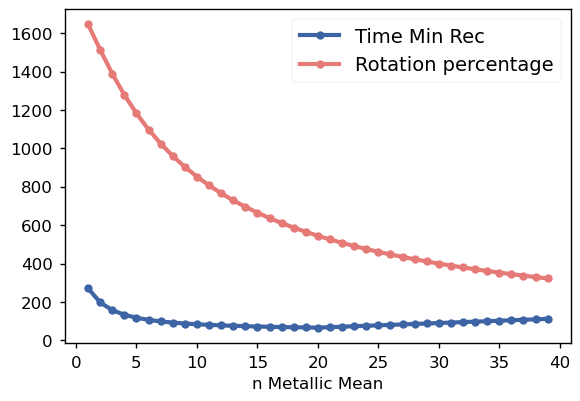

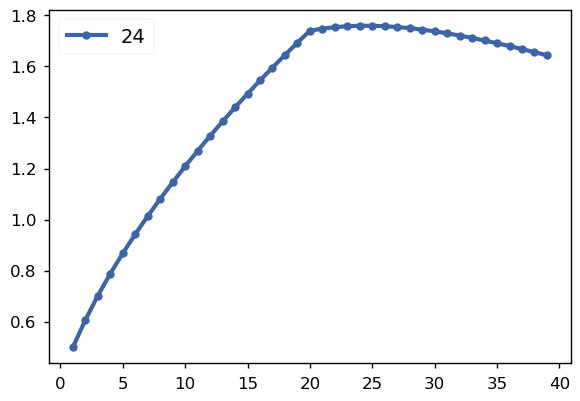

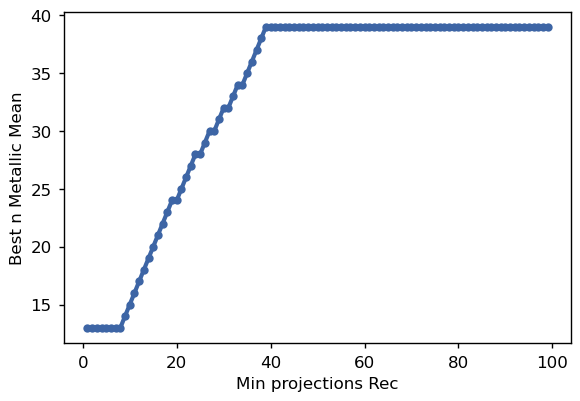

In [53]:
ns = np.array([1,5,7,8,9,10,11,12,13,20,40])
ns = np.arange(1,40,1)
angles = metallic_means(ns)

min_proj = 20
print(angles)
# angles = golden_angle * np.linspace(0.25, 2, 1000)

# for p in projections_per_reconstruction:
plt.plot(ns, scan_time(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Time Min Rec")
plt.plot(ns, rotation_exposure(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Rotation percentage")
# plt.plot(ns, projections_min(angles, exposure_time, rotation_rate, min_proj), "-o", label= "Min projections")
# print(scan_time(angles, exposure_time, rotation_rate))
# print(rotation_exposure(angles, exposure_time, rotation_rate))
# print(projections_min(angles, exposure_time, rotation_rate))
plt.legend()
plt.xlabel('n Metallic Mean')
# plt.ylabel('Temporal resolution (s)')
# plt.title('Time to scan 360 degrees')
# plt.xticks(angles, labels = ns, rotation=45)
# plt.ylim(0,250)
# plt.yscale("log")
plt.show()


# Optim
# optim = 1/ (scan_time(angles, exposure_time, rotation_rate) + rotation_exposure(angles, exposure_time, rotation_rate) + projections_min(angles, exposure_time, rotation_rate))
# optim = measure(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0) / np.max(measure(angles, exposure_time, rotation_rate, min_proj,  1, 1, 0))
# optim1 = measure1(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0, onemax = True)
# plt.plot(ns, optim1, "-o", label= f"{np.argmax(optim1)+1}")
# plt.legend()
# plt.show()

optim2 = measure1(angles, exposure_time, rotation_rate, min_proj, 1, 1, 0, onemax = False)
plt.plot(ns, optim2, "-o",  label = f"{np.argmax(optim2)+1}")
plt.legend()
plt.show()

# measure = (scan_time(angles, exposure_time, rotation_rate) * projections_min(angles, exposure_time, rotation_rate) / rotation_exposure(angles, exposure_time, rotation_rate)**2)
# plt.plot(angles, measure, "-o", label= "Measure Products")
# plt.ylim(0,20)
# plt.xticks(angles, labels = ns, rotation=45)
mins = np.arange(1,100,1)
daxes = []
for mi in mins:
    daxes.append( np.argmax(measure1(angles, exposure_time, rotation_rate, mi, 1, 1, 0, onemax = False)) + 1)
plt.plot(mins, daxes, "-o")
plt.xlabel('Min projections Rec')
plt.ylabel('Best n Metallic Mean')
plt.show()

[222.49223595 149.11688245 108.99922958  84.9844719   69.32966528
  58.41995766  50.41978007  44.31802522  39.51800231  35.64702489
  32.46117975]


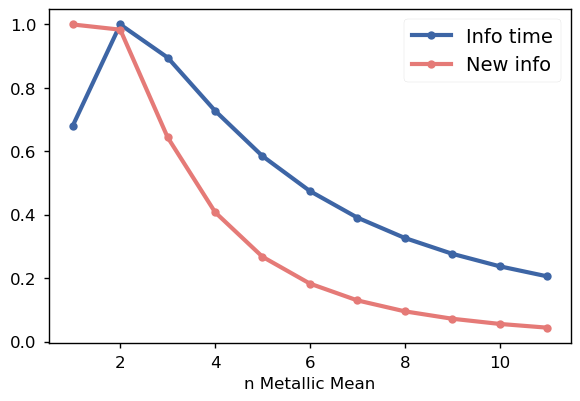

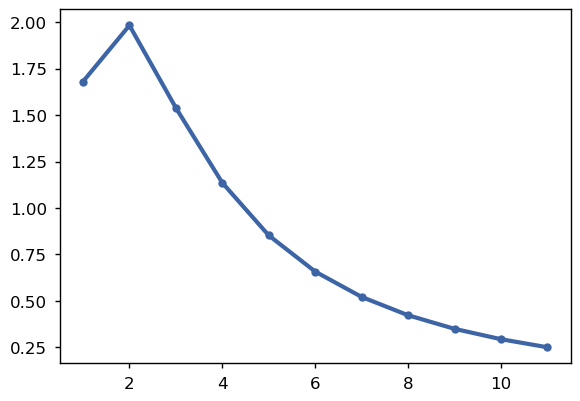

In [54]:
# Solution: Choose the absolute minimum number of projections one could imagine to be included in one projection, 
# and then choose the smallest golden angle that requires that or less projections for one full rotation.

ns = np.array([1,5,7,8,9,10,11,12,13,20,40])
ns = np.arange(1,12,1)
angles = metallic_means(ns)
print(angles)
# angles = golden_angle * np.linspace(0.25, 2, 1000)

# for p in projections_per_reconstruction:
plt.plot(ns, norm_info_time(angles, exposure_time, rotation_rate) , "-o", label= "Info time")
plt.plot(ns, norm_new_info(angles, exposure_time, rotation_rate), "-o", label= "New info")
plt.legend()
plt.xlabel('n Metallic Mean')
# plt.ylabel('Temporal resolution (s)')
# plt.title('Time to scan 360 degrees')
# plt.xticks(angles, labels = ns, rotation=45)
# plt.ylim(0,250)
# plt.yscale("log")
plt.show()

# Optim
optim = ( norm_info_time(angles, exposure_time, rotation_rate) + norm_new_info(angles, exposure_time, rotation_rate))
plt.plot(ns, optim, "-o", label= "Measure Sum")
plt.show()


In [55]:
# Idea: Choose exposuire etc as already done. Decide on temporal resolution. Then check the n order metallic mean.

# Temporal resolution 5min is the goal

# Now let us plot the min temporal resolution for each n order metallic mean

# Ni n=5 required 26 projections for some reason. Why exactly 26? Because close to integer number.

In [56]:
ns = np.array([1,2,3,4,5,7,8,9,10,12,15,20,25,30,40])

angles = metallic_means(ns)

def find_min_projections(angles):
    min_projections = np.zeros(angles.shape)

    for i, angle in enumerate(angles):
        decimal = 360/angle
        multiplier = 1
        while True:
            if np.isclose(decimal*multiplier, np.round(decimal*multiplier), atol=20e-2) and multiplier*angle >= 360-angle:
                min_projections[i] = np.round(decimal*multiplier)
                break
            else:	
                multiplier += 1

    return min_projections

information_projections = find_min_projections(angles)

print(ns)
print(angles)
print(information_projections)


[ 1  2  3  4  5  7  8  9 10 12 15 20 25 30 40]
[222.49223595 149.11688245 108.99922958  84.9844719   69.32966528
  50.41978007  44.31802522  39.51800231  35.64702489  29.79451091
  23.89427108  17.9552236   14.37703343  11.98669621   8.99438202]
[   5.    5.   10.   17.   26.   50.   65.   82.  101.  145.  226.  401.
  626.  901. 1601.]


In [57]:
# Lets take this calculation as good fish, and plot the temporal resolution for each n order metallic mean ++
# Temporal resolution is rotation time plus exposure time
# Also lets plot the exposure ratio

def metallic_temporal_resolution_n_exposure_ratio(ns):
    angles = metallic_means(ns)
    min_projections = find_min_projections(angles)
    rot_time = angles/rotation_rate

    temp_resolution = min_projections * (exposure_time + rot_time + 5) # Five is thr stupidity time of the CT scanner. 
    exposure_ratio = min_projections * exposure_time / temp_resolution
    return temp_resolution, exposure_ratio, min_projections


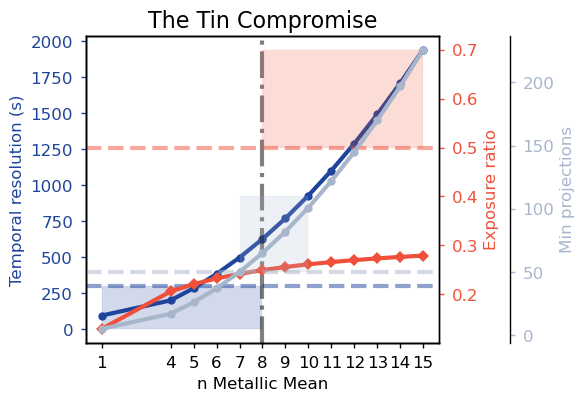

In [58]:

ns = np.array([1,4,5,6,7,8,9,10,11,12,13,14,15])
fill_in = True
goal = 5 #min
t_res, exp_ratio, min_projs = metallic_temporal_resolution_n_exposure_ratio(ns)

fig, ax = plt.subplots()

ax1 = ax.twinx()
ax2 = ax.twinx()
ax2.spines.right.set_position(("axes", 1.2))
left, = ax.plot(ns, t_res, "-o", color = "#1F449C", label= "Temporal resolution")
right, = ax1.plot(ns, exp_ratio, "-D", color = "#F05039", label= "Exposure ratio")

right_wing, = ax2.plot(ns, min_projs, "-o", color = "#A8B6CC", label= "Min projections")

ax.set_xlabel('n Metallic Mean')
ax.set_xticks(ns)
ax.set_xticklabels([str(int(n)) for n in ns])
ax.set_ylabel('Temporal resolution (s)', color = left.get_color())
ax1.set_ylabel('Exposure ratio', color = right.get_color())
ax2.set_ylabel('Min projections', color = right_wing.get_color())

ax.tick_params(axis='y', colors=left.get_color())
ax1.tick_params(axis='y', colors=right.get_color())
ax2.tick_params(axis='y', colors=right_wing.get_color())

ax.axhline(y=60*goal, color=left.get_color(), alpha = 0.5,linestyle='--')
ax1.axhline(y=0.5, color=right.get_color(), alpha = 0.5,linestyle='--')
ax2.axhline(y=50, color=right_wing.get_color(), alpha = 0.5,linestyle='--')

if fill_in :
    ax.fill_betweenx([0,60*goal], 1,8, color = left.get_color(), alpha = 0.2)
    ax1.fill_betweenx([0.7,0.5], 8,15, color = right.get_color(), alpha = 0.2)
    ax2.fill_betweenx([50,110], 7,10, color = right_wing.get_color(), alpha = 0.2)

    ax.axvline(x=8, color="k", alpha = 0.5,linestyle='-.')

plt.title(f"The Tin Compromise")
plt.show()


# Consider plotting rotation ration instead så both should be minimised. 
# Or take projections per time. 

# Conclustions:

# With goal of 300s temporal resolution, one can use max n=8 in order to get sufficient information coverage. 
# Here, there would be 50/50 exposure-rotation, which would be a good compromise. 
# Number of projections would be: 

In [9]:
# Should plot time it takes for 50 projections. How to compensate for the fact that the rotation time is not constant?

def metallic_means_reconstruction_time(ns, projs):
    angles = metallic_means(ns)
    min_projs = find_min_projections(angles)
    angles = angles[np.where(min_projs <= projs)]
    rot_time = angles/rotation_rate
    time = projs * (exposure_time + rot_time + 5) # Five is thr stupidity time of the CT scanner.
    rot_share = projs * rot_time/ time
    return time, rot_share, ns[np.where(find_min_projections(angles) <= projs)]

[2315.57647469 1456.15294937 1358.31040803 1290.12473538 1240.12362544
 1201.98765764 1171.98751445 1147.79390558 1127.88237344 1289.01020408
 1492.00805009 1709.80646087 1942.40526316]


Text(0.5, 1.0, 'Scan Time 125 Projections if Possible')

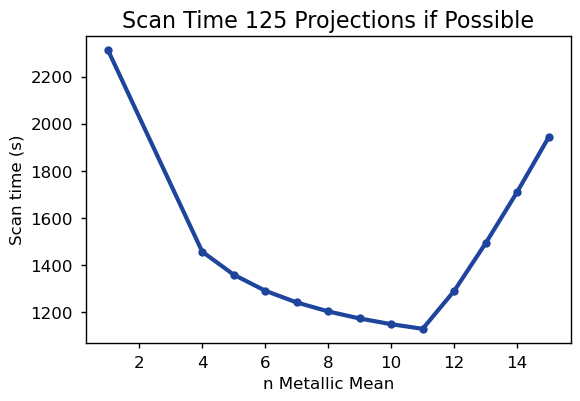

In [10]:
fig, ax = plt.subplots()

# ax1 = ax.twinx()
# ax2 = ax.twinx()
n_projs = 125

t_res1, rot_share, ms = metallic_means_reconstruction_time(ns, n_projs)

merged = np.zeros((len(t_res)))
for i, t in enumerate(t_res):
    try:
        merged[i] = t_res1[i]
    except:
        merged[i] = t


print(merged)

left, = ax.plot(ns, merged, "-o", color = "#1F449C", label= "Reconstruction time")
# right, = ax1.plot(ns, rot_share, "-D", color = "#F05039", label= "Rotation ratio")
ax.set_xlabel('n Metallic Mean')
ax.set_ylabel('Scan time (s)')
ax.set_title(f"Scan Time {n_projs} Projections if Possible")


In [30]:
golden = ((np.sqrt(5) + 1) / 2 * 360 )% 360
golden = np.min([golden, np.abs(360-golden)])
print(golden)
hermite = ((np.sqrt(4+100) +10) / 2 * 360 )% 360
angles = np.arange(0, 200* golden, golden)%360

# angles = np.arange(0, 200* hermite, hermite)%360
print(golden)
angles = np.zeros((10,20))
starts = (golden) * np.arange(0,10) % 18

for i, start_p in enumerate(starts):
    ct_angles = np.arange(start_p, 360, 18) #np.linspace(start_p, 20*18, 20, endpoint=True)
    angles[i, :] = ct_angles


# print(starts)
angles = np.reshape(angles, -1)
print(angles)
from matplotlib.animation import FuncAnimation

137.50776405003785
137.50776405003785
[  0.          18.          36.          54.          72.
  90.         108.         126.         144.         162.
 180.         198.         216.         234.         252.
 270.         288.         306.         324.         342.
  11.50776405  29.50776405  47.50776405  65.50776405  83.50776405
 101.50776405 119.50776405 137.50776405 155.50776405 173.50776405
 191.50776405 209.50776405 227.50776405 245.50776405 263.50776405
 281.50776405 299.50776405 317.50776405 335.50776405 353.50776405
   5.0155281   23.0155281   41.0155281   59.0155281   77.0155281
  95.0155281  113.0155281  131.0155281  149.0155281  167.0155281
 185.0155281  203.0155281  221.0155281  239.0155281  257.0155281
 275.0155281  293.0155281  311.0155281  329.0155281  347.0155281
  16.52329215  34.52329215  52.52329215  70.52329215  88.52329215
 106.52329215 124.52329215 142.52329215 160.52329215 178.52329215
 196.52329215 214.52329215 232.52329215 250.52329215 268.52329215
 286.523

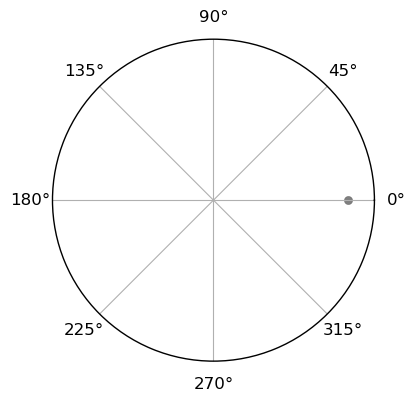

In [31]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "polar"})
# ax.set_axis_off()
ax.set_rticks([])
# angles = [0]

def add_golden_point(frame):
    angle = angles[frame] * np.pi/180
    # angle = angles[-1] + golden/180*np.pi
        # angles.append(angle)
    ax.scatter(angle, 1 , color = "k", alpha = 0.5)
    ax.set_rlim(0,1.2)


anim_created = FuncAnimation(fig, add_golden_point, frames=101, interval=500)

# for i, angle in enumerate(angles):
#     # ax.plot([angle, angle], [0,1], color = "k", alpha = 0.5)
#     # ax.text(angle, 1.1, str(i+1), ha = "center", va = "bottom")
#     # ax.scatter(angle, 1 , color = "k", alpha = 0.2)
#     add_golden_point(ax, angle)


# plt.show()

In [32]:
from IPython import display

anim_created.save("golden_v2_137.mp4", writer = "ffmpeg")
# anim_created.save("hermite.gif", writer = "imagemagick")

# video = anim_created.to_html5_video()
# html = display.HTML(video)
# display.display(html)
 
# good practice to close the plt object.
# plt.close()

In [ ]:
# Golden ratio sampling v2


print(golden)
angles = np.zeros((10,20))
starts = (golden) * np.arange(0,10) % 18

for i, start_p in enumerate(starts):
    ct_angles = np.arange(start_p, 360, 18) #np.linspace(start_p, 20*18, 20, endpoint=True)
    angles[i, :] = ct_angles


# print(starts)
angles = np.reshape(angles, -1)
print(angles)

In [43]:
def golden_v2_reconstruction_time(projs_batch: int, rotation_rate= 20.1, exposure = 1.2):

    angle = 360/projs_batch # 18 if projs_batch = 20
    rot_time = 360/rotation_rate #s
    extra_time = 5 #s
    extra_rot = rot_time
    exposure_time = projs_batch * exposure #s

    time = exposure_time + rot_time + extra_time + extra_rot

    return time, rot_time/time, angle



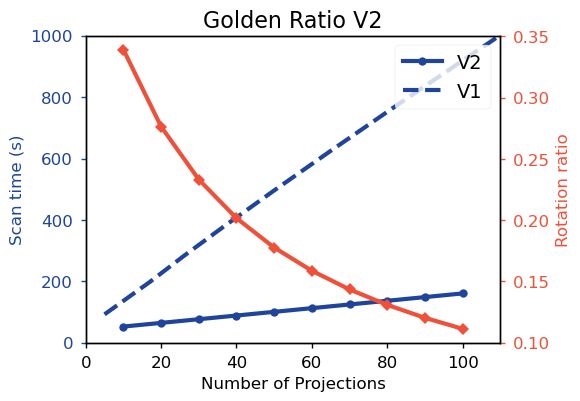

In [65]:
projs_batch = np.arange(10,110,10)
ns = np.array([1,4,5,6,7,8,9,10,11,12,13,14,15])
t_res_old, exp_ratio, min_projs = metallic_temporal_resolution_n_exposure_ratio(ns)
t_res, exposure_share, angle = golden_v2_reconstruction_time(projs_batch)

fig, ax = plt.subplots()

ax1 = ax.twinx()

left, = ax.plot(projs_batch, t_res, "-o", color = "#1F449C", label= "V2")
right, = ax1.plot(projs_batch, exposure_share, "-D", color = "#F05039", label= "Exposure ratio")
ax.set_xlabel('Number of Projections')
ax.set_ylabel('Scan time (s)', color=left.get_color())
ax1.set_ylabel('Rotation ratio', color=right.get_color())
ax.set_title(f"Golden Ratio V2")

ax.tick_params(axis='y', colors=left.get_color())
ax1.tick_params(axis='y', colors=right.get_color())
# ax2.tick_params(axis='y', colors=right_wing.get_color())

# t_DR = projs_batch*(1.2+3) + 18
ax.plot(min_projs, t_res_old, "--", color = "#1F449C", label= "V1")

ax.set_xlim(0,110)
ax.set_ylim(0,1000)
ax.legend(loc = "upper right")




In [70]:
nproj = 20
increment = 360/nproj
golden_increment = lambda n:  (n* (np.sqrt(5) + 1) / 2 * increment )% increment

samples = np.arange(0,15)
print(golden_increment(samples))

other_increment = lambda n: (n*0.38196601125*increment)%increment

print(other_increment(samples))


print((np.sqrt(5) + 1) / 2)

[ 0.         11.1246118   4.24922359 15.37383539  8.49844719  1.62305899
 12.74767078  5.87228258 16.99689438 10.12150618  3.24611797 14.37072977
  7.49534157  0.61995337 11.74456516]
[ 0.          6.8753882  13.7507764   2.62616461  9.50155281 16.37694101
  5.25232922 12.12771742  1.00310562  7.87849382 14.75388203  3.62927023
 10.50465843 17.38004663  6.25543484]
1.618033988749895


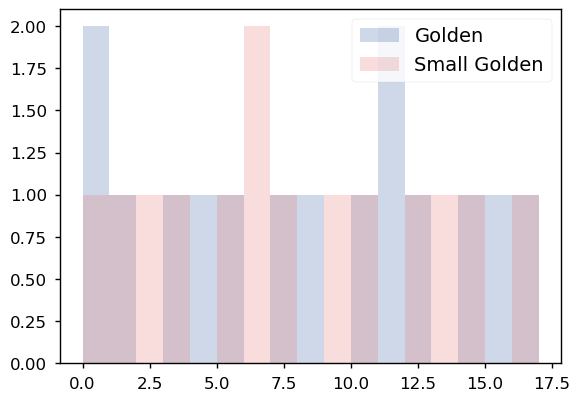

In [71]:
bins = np.arange(0, increment, 1)
plt.hist( golden_increment(samples), bins=bins, label="Golden", alpha=0.25)
plt.hist( other_increment(samples), bins=bins, label="Small Golden", alpha=0.25) 
plt.legend()
plt.show()

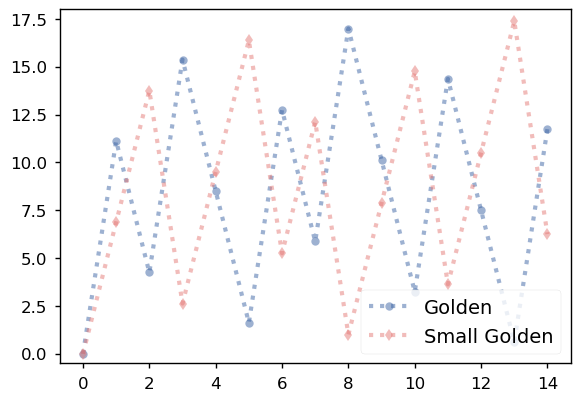

In [66]:

plt.plot(samples, golden_increment(samples), ":o", label="Golden", alpha=0.5)
plt.plot(samples, other_increment(samples), ":d", label="Small Golden", alpha=0.5)
plt.legend()
plt.ylim(-0.5,increment)
plt.show()

In [49]:
original_golden = lambda n: (n*np.min(360-360/(0.5*(1+np.sqrt(5)))))%360

ns = np.arange(0,200)
# print(original_golden(ns))
nprojs = 20

golden = ((np.sqrt(5) + 1) / 2 * 360 )% 360
golden = np.min([golden, np.abs(360-golden)])

angles = np.zeros((10,20))
starts = (golden) * np.arange(0,10) % 18

print(starts)

# plt.hist(original_golden(ns), bins=np.arange(0,360,18), label="Golden", alpha=0.25)

round_1 = np.zeros(nprojs)
sorted_angles = original_golden(ns)
sorted_angles.sort()
for i in range(nprojs):
    round_1[i] = np.min( sorted_angles[np.where(sorted_angles >= i*18)])
    # sorted_angles.pop(round_1[i])
    # sorted_angles = np.delete(sorted_angles,round_1[i])

print(round_1)

sorted_angles = sorted_angles[np.in1d(sorted_angles, round_1, invert=True)]

round_2 = np.zeros(nprojs)
for i in range(nprojs):
    index_2 = np.argmin( np.abs(sorted_angles[np.where(sorted_angles >=  i*(starts[1]+18)%360 )] - i*(starts[1]+18)%360))
    optional = sorted_angles[np.where(sorted_angles >= i*(starts[1]+18)%360)]
    round_2[i] = optional[index_2]
    # print(round_2[i])

print(round_2)

#Or instead just find the golden angle that is closest to the ones calculated using the other method. 

[ 0.         11.50776405  5.0155281  16.52329215 10.0310562   3.53882025
 15.0465843   8.55434835  2.0621124  13.56987645]
[  0.          18.25311285  36.50622571  55.4503149   72.58540455
  90.8385174  110.9006298  126.22671991 145.1708091  163.42392195
 180.5590116  198.81212446 217.75621365 236.0093265  253.14441615
 270.2795058  288.53261866 308.59473106 325.7298207  342.86491035]
[  1.11802321  30.6521802   60.1863372   89.02951786 118.56367486
 148.09783185 177.63198885 208.28416905 237.81832605 268.47050625
 295.0776405  327.53882025 355.2639777   25.9161579   53.64131536
  83.17547235 112.70962935 143.36180955 172.89596655 203.54814676]


[  0.          18.          36.          54.          72.
  90.         108.         126.         144.         162.
 180.         198.         216.         234.         252.
 270.         288.         306.         324.         342.
  11.50776405  29.50776405  47.50776405  65.50776405  83.50776405
 101.50776405 119.50776405 137.50776405 155.50776405 173.50776405
 191.50776405 209.50776405 227.50776405 245.50776405 263.50776405
 281.50776405 299.50776405 317.50776405 335.50776405 353.50776405
   5.0155281   23.0155281   41.0155281   59.0155281   77.0155281
  95.0155281  113.0155281  131.0155281  149.0155281  167.0155281
 185.0155281  203.0155281  221.0155281  239.0155281  257.0155281
 275.0155281  293.0155281  311.0155281  329.0155281  347.0155281
  16.52329215  34.52329215  52.52329215  70.52329215  88.52329215
 106.52329215 124.52329215 142.52329215 160.52329215 178.52329215
 196.52329215 214.52329215 232.52329215 250.52329215 268.52329215
 286.52329215 304.52329215 322.52329215 340.52

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 11.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
        198., 216., 234., 252., 270., 288., 306., 324., 342.]),
 <BarContainer object of 19 artists>)

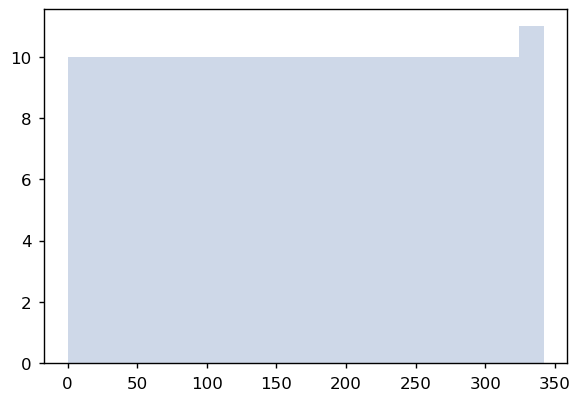

In [6]:
golden = ((np.sqrt(5) + 1) / 2 * 360 )% 360
golden = np.min([golden, np.abs(360-golden)])

angles = np.zeros((10,20))
starts = (golden) * np.arange(0,10) % 18

for i, start_p in enumerate(starts):
    ct_angles = np.arange(start_p, 360, 18) #np.linspace(start_p, 20*18, 20, endpoint=True)
    angles[i, :] = ct_angles


# print(starts)
angles = np.reshape(angles, -1)

print(angles)

plt.hist(angles, bins=np.arange(0,360,18), label="Golden", alpha=0.25)